In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import graphviz
import pydotplus
import io
from scipy import misc

In [2]:
df = pd.read_csv("data/student-alcohol-maths.csv")

In [3]:
df.shape

(395, 33)

In [4]:
features = ["age", "Walc", "Dalc", "health", "absences", "studytime", "failures"]
target = ["sex"]

In [5]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [6]:
print("Training size: {}; Test size: {}".format(len(train), len(test)))

Training size: 316; Test size: 79


In [7]:
train.shape

(316, 33)

In [8]:
clf = DecisionTreeClassifier(max_depth=3)

In [9]:
X_train=train[features]
y_train=train[target]

X_test=test[features]
y_test=test[target]

In [10]:
dt = clf.fit(X_train, y_train)

In [11]:
def show_tree(tree, features, path):
    f=io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


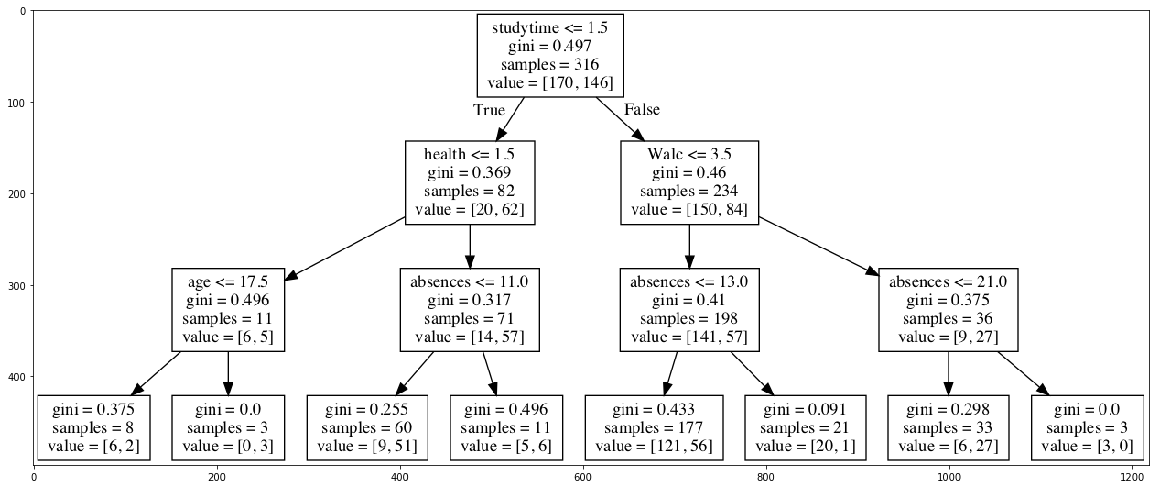

In [12]:
show_tree(dt, features, "student_data.png")

In [13]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.03%


In [14]:
print('Female proportion: %.2f%%' % ((df["sex"].value_counts()['F'] / df["sex"].count()) * 100))

Female proportion: 52.66%
